In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [2]:
df= pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.dropna(inplace=True)

In [4]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 2.1+ MB


In [8]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [9]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


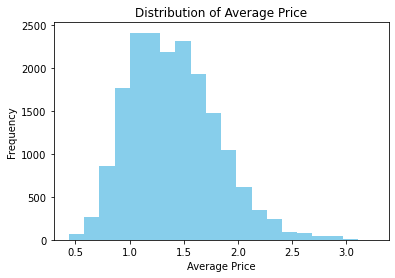

In [10]:
plt.hist(df['AveragePrice'], bins=20, color='skyblue')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.title('Distribution of Average Price')
plt.show()

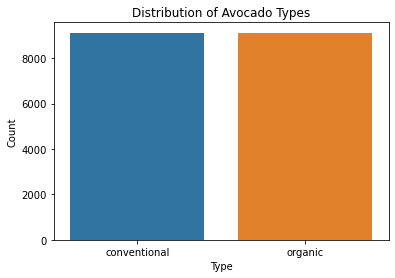

In [11]:
sns.countplot(data=df, x='type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Avocado Types')
plt.show()

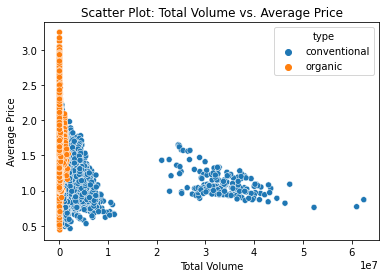

In [12]:
sns.scatterplot(data=df, x='Total Volume', y='AveragePrice', hue='type')
plt.xlabel('Total Volume')
plt.ylabel('Average Price')
plt.title('Scatter Plot: Total Volume vs. Average Price')
plt.show()

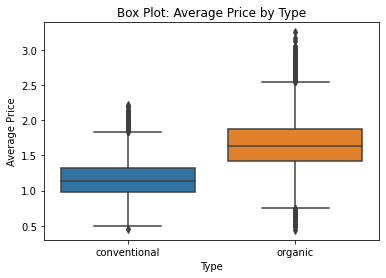

In [13]:
sns.boxplot(data=df, x='type', y='AveragePrice')
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.title('Box Plot: Average Price by Type')
plt.show()

<AxesSubplot:>

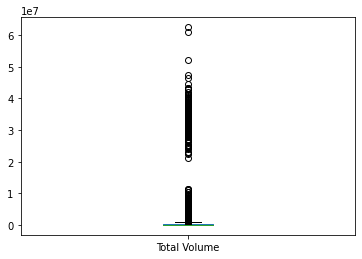

In [14]:
df['Total Volume'].plot.box()

<AxesSubplot:>

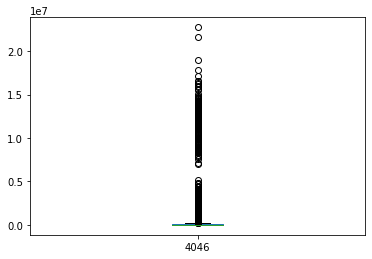

In [15]:
df['4046'].plot.box()

<AxesSubplot:>

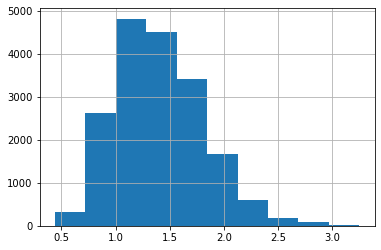

In [16]:
df.AveragePrice.hist()

<AxesSubplot:>

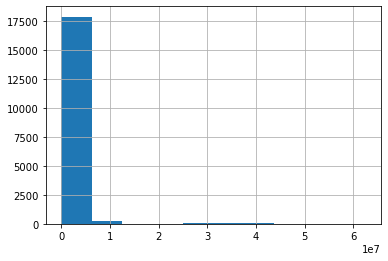

In [17]:
df['Total Volume'].hist()

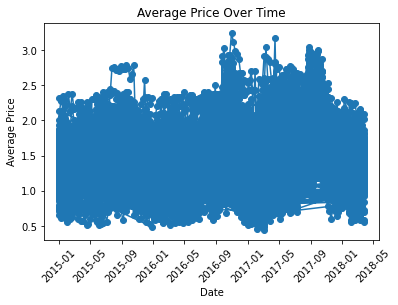

In [18]:
df['Date'] = pd.to_datetime(df['Date'])
plt.plot(df['Date'], df['AveragePrice'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price Over Time')
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Year')

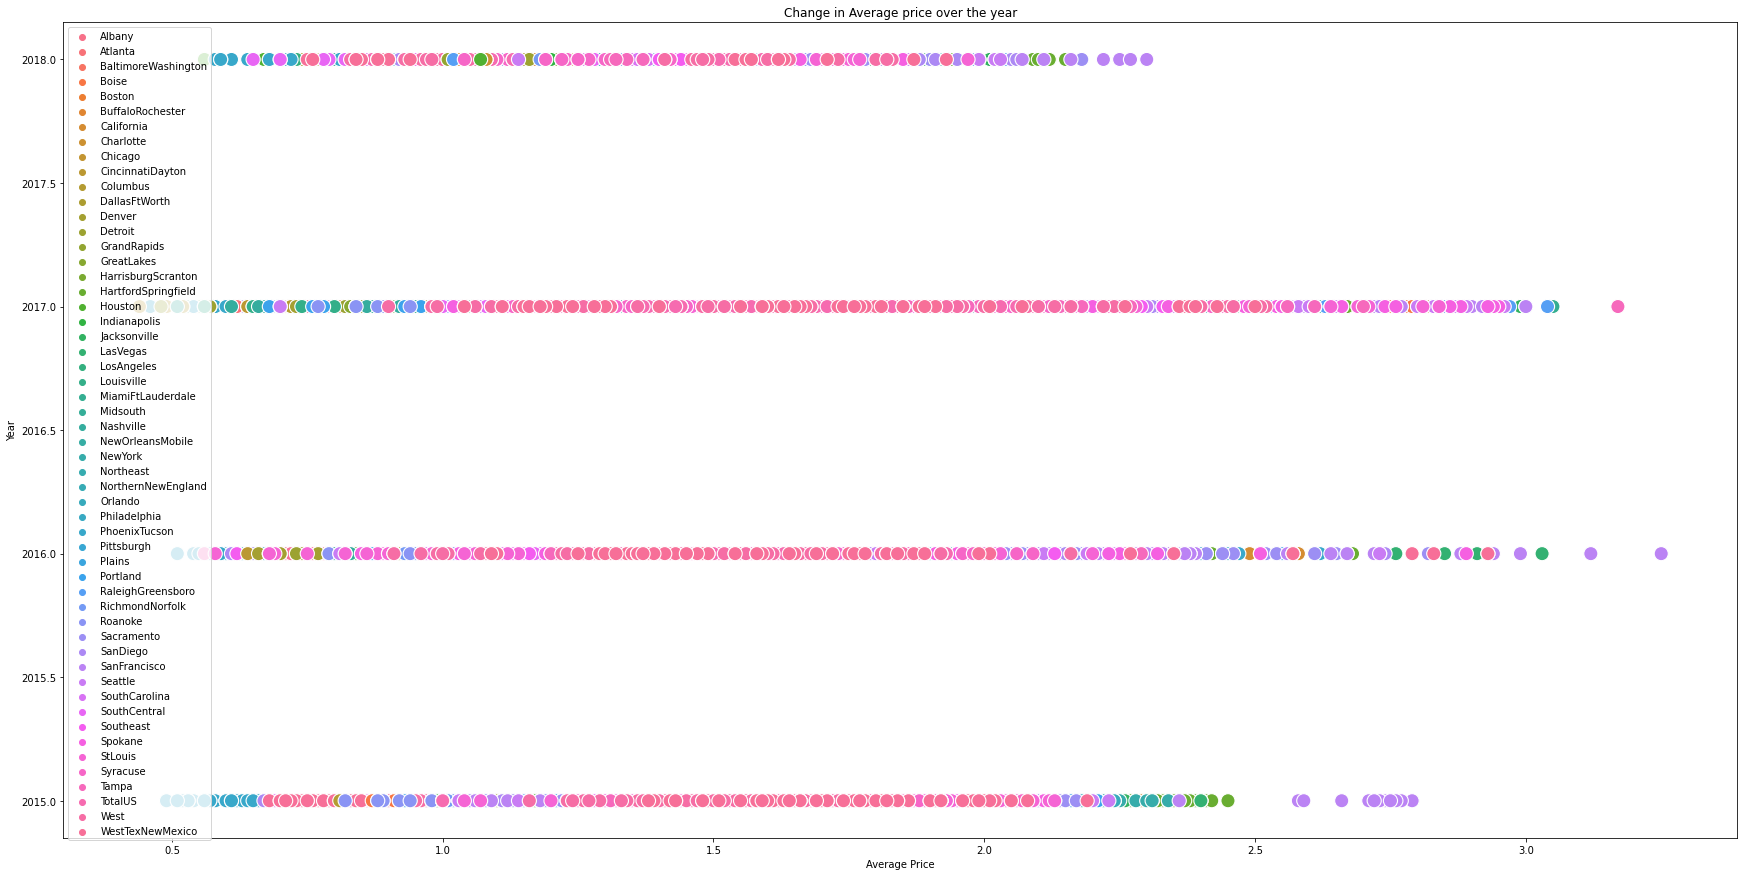

In [19]:
plt.figure(figsize=(30,15))
plt.title('Change in Average price over the year')
sns.scatterplot(data=df,x='AveragePrice', y='year', hue=df.region, s=200)
plt.legend(loc='upper left', fontsize='10')
plt.xlabel('Average Price')
plt.ylabel('Year')

In [20]:
df.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [21]:
df.region.value_counts()

Southeast              338
Tampa                  338
Portland               338
RaleighGreensboro      338
DallasFtWorth          338
Denver                 338
GrandRapids            338
Charlotte              338
Jacksonville           338
PhoenixTucson          338
MiamiFtLauderdale      338
LosAngeles             338
California             338
Orlando                338
NewOrleansMobile       338
Columbus               338
Plains                 338
Chicago                338
CincinnatiDayton       338
SanFrancisco           338
Nashville              338
StLouis                338
Sacramento             338
SanDiego               338
NewYork                338
BuffaloRochester       338
Boise                  338
NorthernNewEngland     338
LasVegas               338
Northeast              338
RichmondNorfolk        338
West                   338
HartfordSpringfield    338
Louisville             338
Houston                338
Detroit                338
Boston                 338
H

In [22]:
df.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

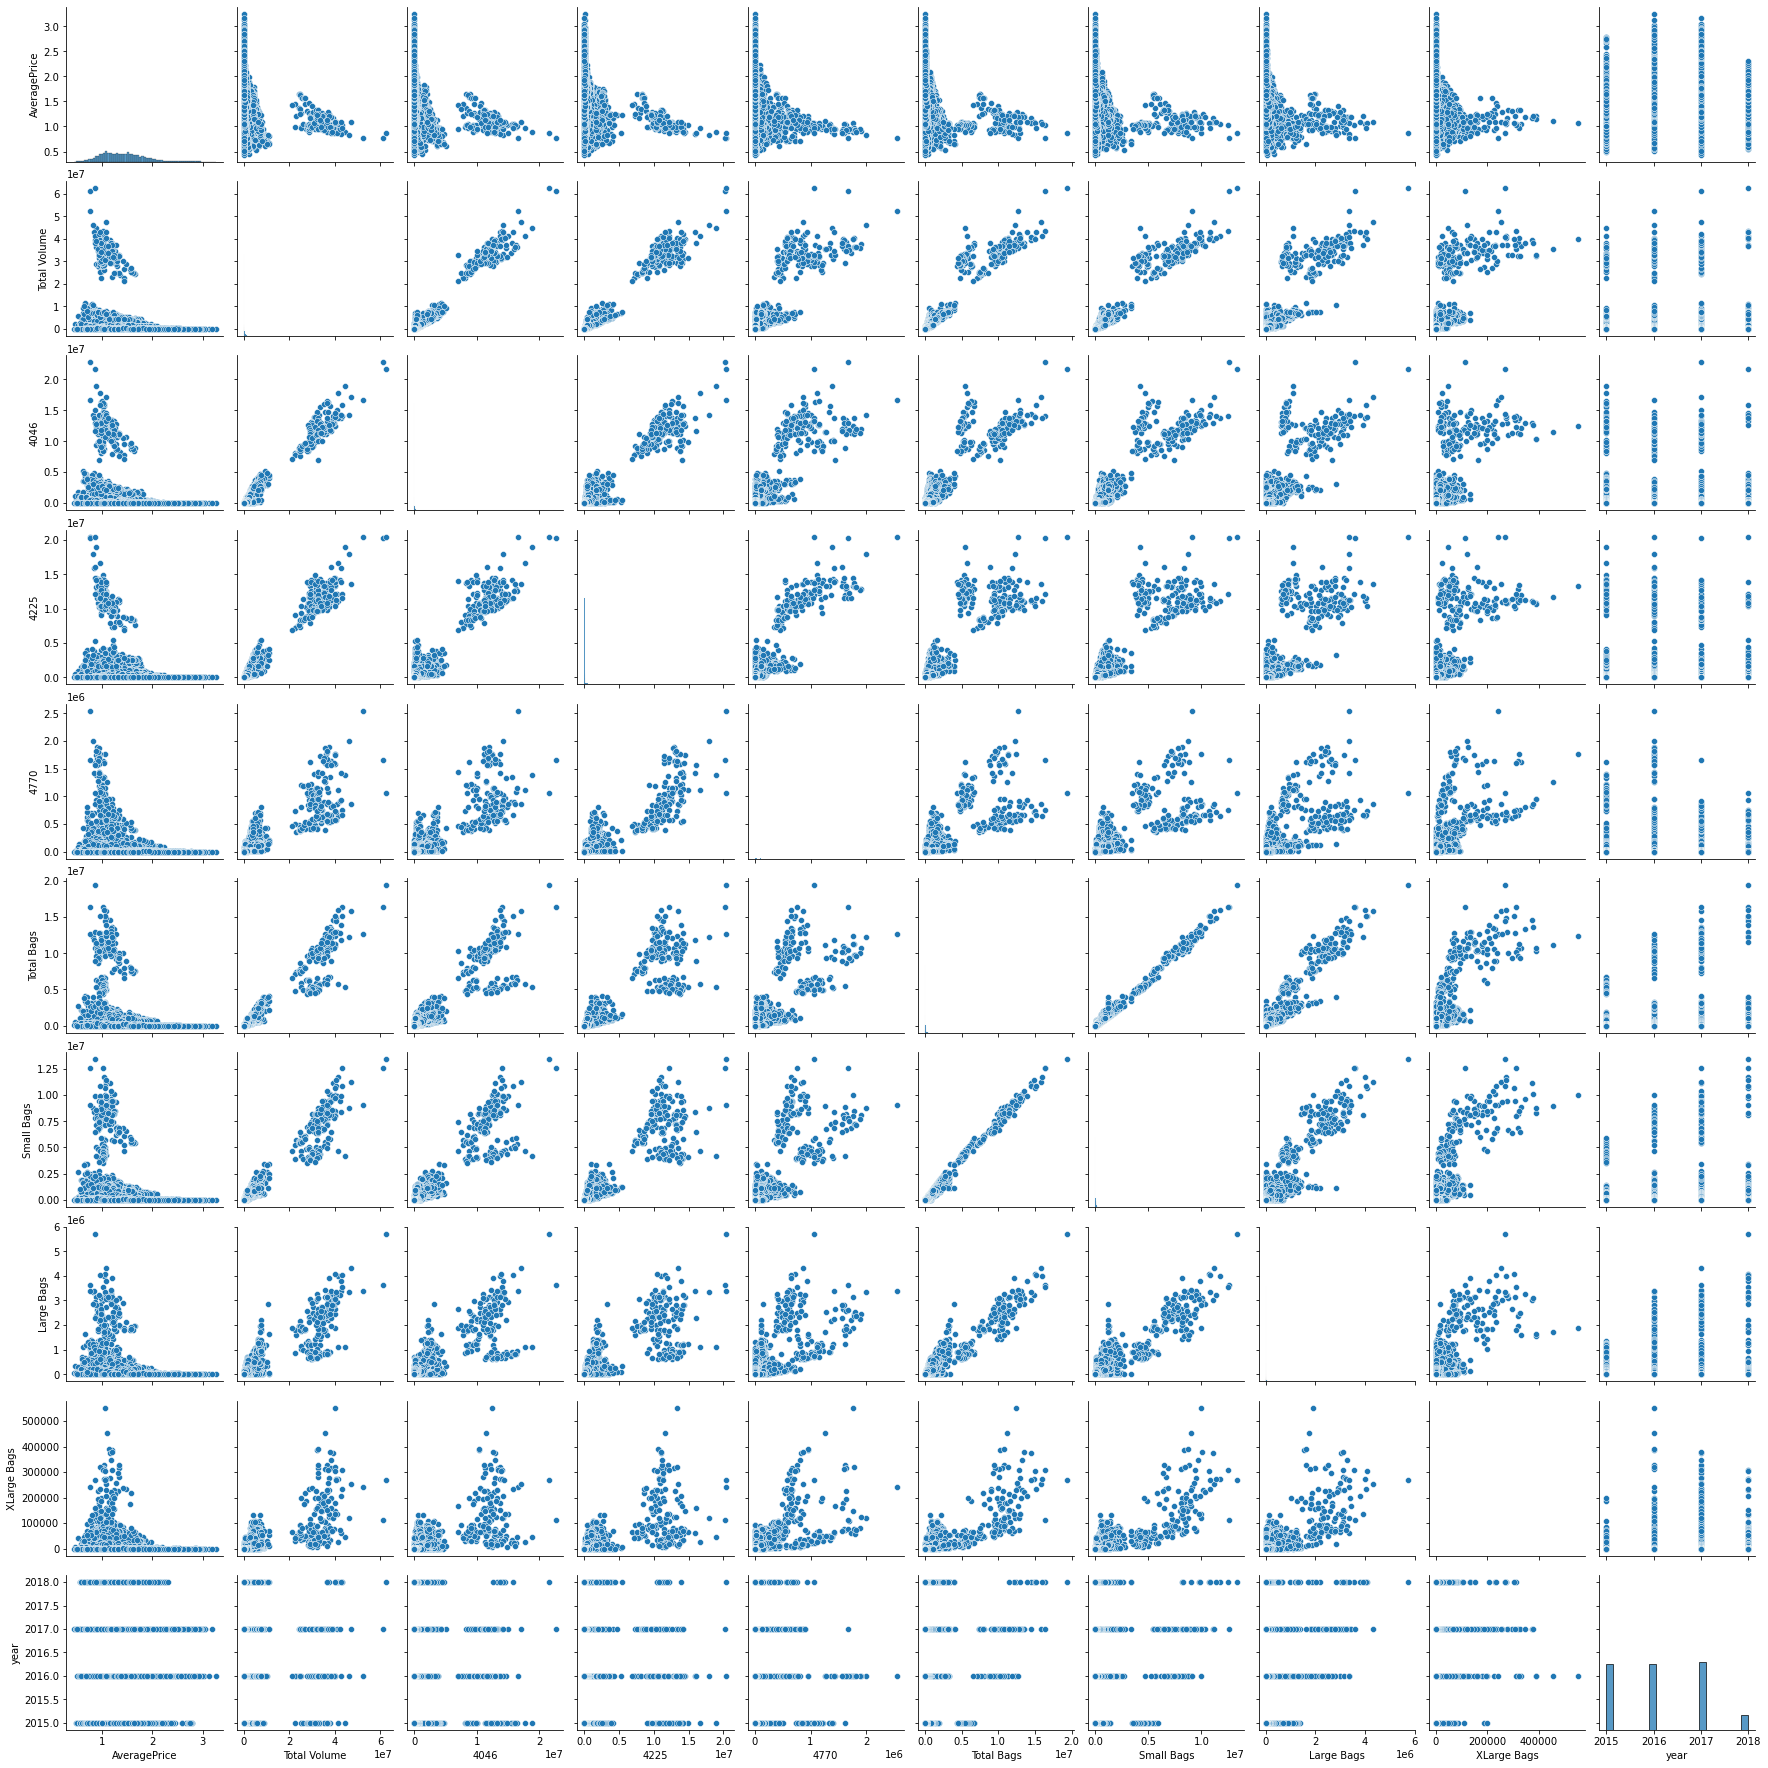

In [23]:
sns.pairplot(df)

In [24]:
distbn_regn=df.groupby('region')['AveragePrice'].sum()
distbn_regn

region
Albany                 527.63
Atlanta                452.23
BaltimoreWashington    518.57
Boise                  455.67
Boston                 517.44
BuffaloRochester       512.69
California             471.62
Charlotte              542.84
Chicago                526.19
CincinnatiDayton       408.71
Columbus               423.44
DallasFtWorth          366.93
Denver                 411.88
Detroit                431.32
GrandRapids            508.69
GreatLakes             452.43
HarrisburgScranton     511.49
HartfordSpringfield    614.70
Houston                354.20
Indianapolis           444.13
Jacksonville           510.70
LasVegas               466.75
LosAngeles             411.01
Louisville             434.90
MiamiFtLauderdale      482.83
Midsouth               474.81
Nashville              409.69
NewOrleansMobile       441.02
NewYork                583.92
Northeast              541.45
NorthernNewEngland     499.36
Orlando                509.10
Philadelphia           551.66
Pho

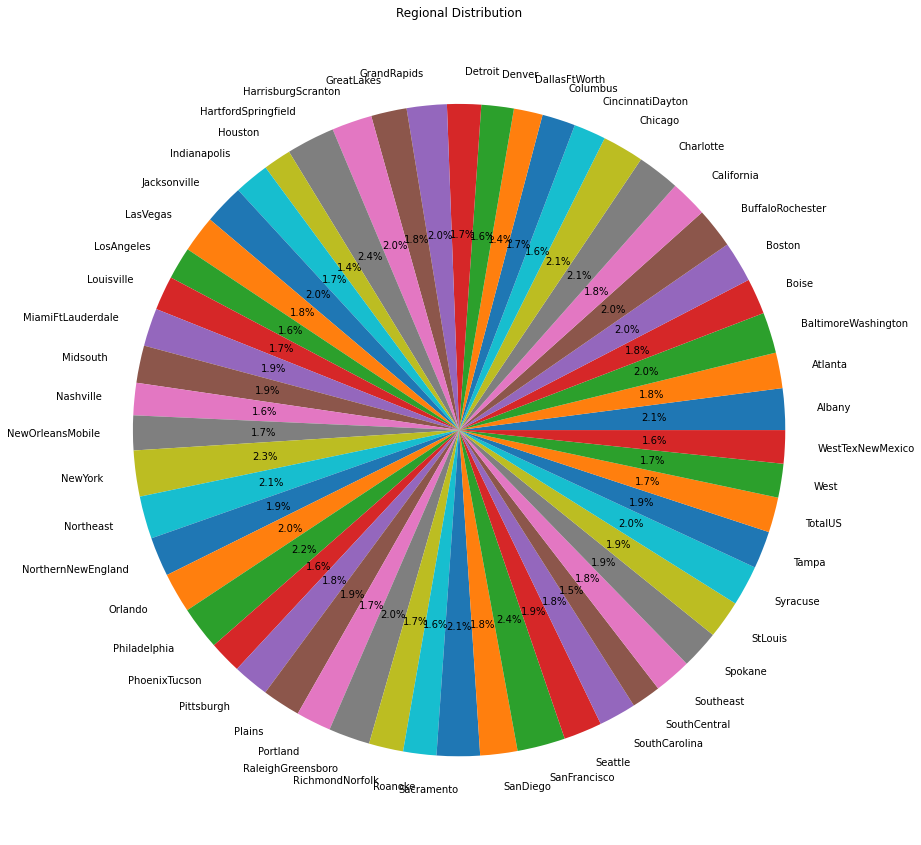

In [25]:
plt.figure(figsize=(30, 15))
distbn_regn.plot.pie(autopct='%1.1f%%')
plt.title('Regional Distribution')
plt.ylabel('')
plt.show()

<AxesSubplot:>

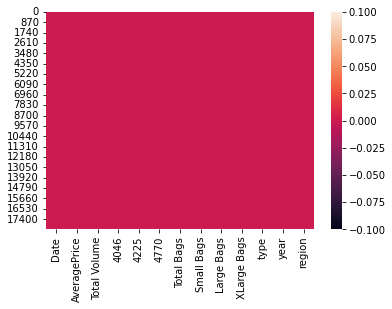

In [26]:
sns.heatmap(df.isnull())

In [27]:
correlation=df.corr()

In [28]:
correlation

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


<AxesSubplot:>

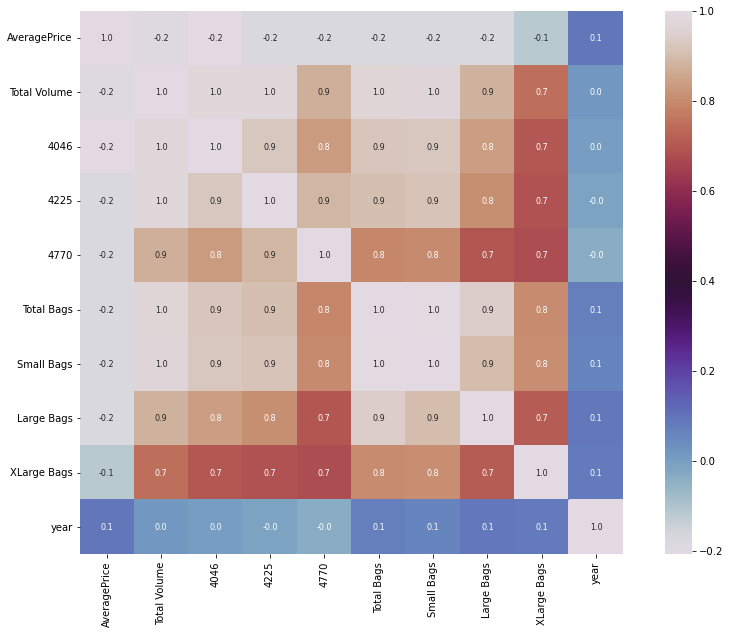

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation, cbar=True, square=True, fmt= '.1f', annot = True, annot_kws={'size':8}, cmap='twilight')

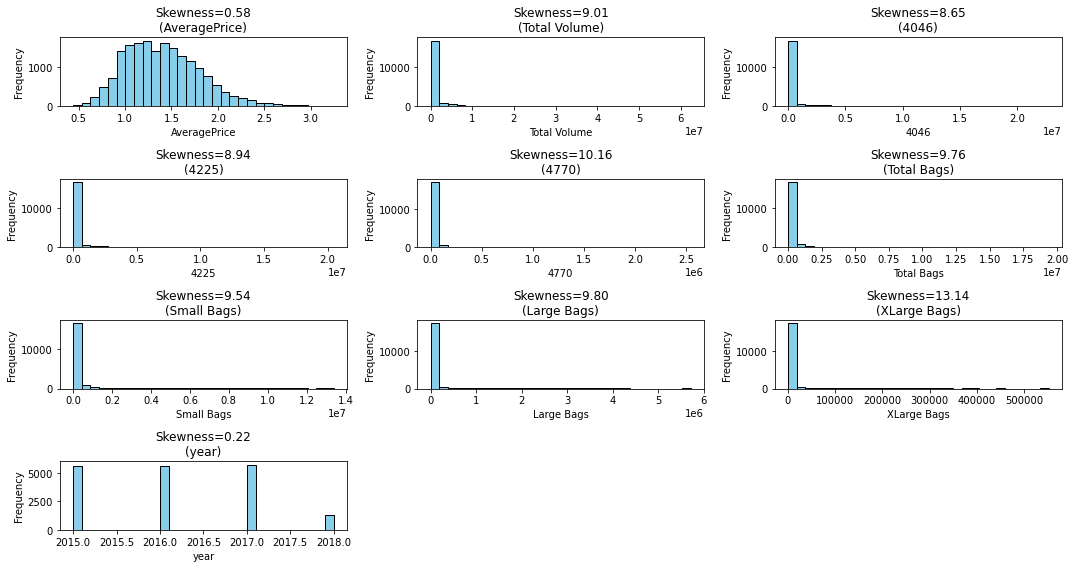

In [30]:
import math
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
skewness = numerical_columns.skew()

num_cols = numerical_columns.shape[1]
num_rows = math.ceil(num_cols / 3)


plt.figure(figsize=(15, 8))
for i, column in enumerate(numerical_columns.columns):
    plt.subplot(num_rows, 3, i + 1)
    plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Skewness={skewness[column]:.2f}\n({column})')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [31]:
print(df.duplicated().sum())

0


Data Pre-processing

In [32]:
df.drop_duplicates(inplace=True)

In [33]:
df['Date'] = pd.to_datetime(df['Date'])

In [34]:
from scipy import stats
#to check the outliers and handle it
z_scores = stats.zscore(df['Total Volume'])
df = df[(z_scores < 3)]  

In [35]:
scaler = StandardScaler()
df['Total Volume'] = scaler.fit_transform(df[['Total Volume']].values)

if 'type' in df.columns:
    # Perform one-hot encoding for 'type'
    df = pd.get_dummies(df, columns=['type'])
else:
    print("The 'type' column does not exist in the DataFrame.")

<ipython-input-35-9705029ca32a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Volume'] = scaler.fit_transform(df[['Total Volume']].values)


In [36]:
df['Calculated_Total'] = df['4046'] + df['4225'] + df['4770']
inconsistent_data = df[df['Calculated_Total'] != df['Total Volume']]

In [37]:
df.loc[df['Calculated_Total'] != df['Total Volume'], 'Calculated_Total'] = df['4046'] + df['4225'] + df['4770']

In [38]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['Date']=le.fit_transform(df['Date'])
df['region']=le.fit_transform(df['region'])
df['Date']

0         51
1         50
2         49
3         48
4         47
        ... 
18244    161
18245    160
18246    159
18247    158
18248    157
Name: Date, Length: 18078, dtype: int64

In [39]:
df.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_conventional,type_organic,Calculated_Total
0,51,1.33,-0.393457,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,1,0,55539.75
1,50,1.35,-0.401164,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,1,0,45371.42


In [40]:
X=df.drop('AveragePrice', axis=1)
y=df['AveragePrice']


In [41]:
print(X)

       Date  Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0        51     -0.393457  1036.74   54454.85   48.16     8696.87     8603.62   
1        50     -0.401164   674.28   44638.81   58.33     9505.56     9408.07   
2        49     -0.349007   794.70  109149.67  130.50     8145.35     8042.21   
3        48     -0.381307  1132.00   71976.41   72.58     5811.16     5677.40   
4        47     -0.404323   941.48   43838.39   75.78     6183.95     5986.26   
...     ...           ...      ...        ...     ...         ...         ...   
18244   161     -0.432290  2046.96    1529.20    0.00    13498.67    13066.82   
18245   160     -0.434914  1191.70    3431.50    0.00     9264.84     8940.04   
18246   159     -0.435014  1191.92    2452.79  727.94     9394.11     9351.80   
18247   158     -0.433006  1527.63    2981.04  727.01    10969.54    10919.54   
18248   157     -0.431949  2894.77    2356.13  224.53    12014.15    11988.14   

       Large Bags  XLarge B

In [42]:
print(y)

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18078, dtype: float64


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
a=LinearRegression()

In [45]:
a.fit(X_train, y_train)

LinearRegression()

In [46]:
training_data_prediction=a.predict(X_train)

In [47]:
from sklearn import metrics
r2_train= metrics.r2_score(y_train, training_data_prediction)
print('Squared Value:' ,r2_train)

Squared Value: 0.4416443527765388


In [48]:
y_pred =a.predict(X_test)

In [49]:
ms = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", ms)
print("R-squared:", r2)

Mean Squared Error: 0.08659188340437031
R-squared: 0.4504102899100366


In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
from sklearn.linear_model import Lasso,Ridge
lasso_reg = Lasso(max_iter=10000) 
lasso_reg.fit(X_train, y_train)

Lasso(max_iter=10000)

In [52]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(max_iter=10000)
elastic_net = ElasticNet(tol=1e-4)
elastic_net.fit(X_train, y_train)

ElasticNet()

In [53]:
ls=Lasso(alpha=0.0001)
ls.fit(X_train,y_train)
ls.score(X_train,y_train)

0.4415174447520829

In [54]:
rd=Ridge(alpha=0.0001)
rd.fit(X_train,y_train)
rd.score(X_train,y_train)

0.44154910194689445

In [55]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
lm=LinearRegression()
dtr=DecisionTreeRegressor()
svr=SVR()
knr=KNeighborsRegressor()
ls=Lasso(alpha=0.0001)
rd=Ridge(alpha=0.0001)

In [56]:
model=[lm,dtr,svr,knr,ls,rd]

for m in model:
    m.fit(X_train,y_train)
    pred=m.predict(X_test)
    print('error:',m)
    print('Mean absolute error:',mean_absolute_error(y_test,pred))
    print('Mean squared error:',mean_squared_error(y_test,pred))
    print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error: LinearRegression()
Mean absolute error: 0.2268160573726971
Mean squared error: 0.08659188365262878
Root Mean squared error: 0.2942649888325636
error: DecisionTreeRegressor()
Mean absolute error: 0.11334900442477876
Mean squared error: 0.03184327986725664
Root Mean squared error: 0.17844685446164815
error: SVR()
Mean absolute error: 0.18024813170779272
Mean squared error: 0.061922777692219516
Root Mean squared error: 0.2488428775195696
error: KNeighborsRegressor()
Mean absolute error: 0.09304424778761061
Mean squared error: 0.0179376703539823
Root Mean squared error: 0.13393158833517319
error: Lasso(alpha=0.0001)
Mean absolute error: 0.22671022688696546
Mean squared error: 0.08658232090483539
Root Mean squared error: 0.2942487398525869
error: Ridge(alpha=0.0001)
Mean absolute error: 0.22671929705451857
Mean squared error: 0.08657302284259172
Root Mean squared error: 0.29423293976472403


In [57]:
#checking the averge price change at an instance.
instance_to_predict = [[51,1.33,-0.393457,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,1,0,55539.75]] 
predicted_price = a.predict(instance_to_predict)
print(f"Predicted Average Price: ${predicted_price[0]:.2f}")

Predicted Average Price: $548.82
